## Data Visualization in Python

In [8]:
import os
import math
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
os.getcwd()

'/Users/markruperto/PyCharmMiscProject'

In [10]:
os.chdir('/Users/markruperto/Desktop/School/GCU/BIT-431/Topic 7')

In [11]:
os.getcwd()

'/Users/markruperto/Desktop/School/GCU/BIT-431/Topic 7'

In [12]:
hr_data = pd.read_excel("HR1 Data.xlsx")

In [13]:
print(hr_data.head())

      EmpID  Satisfaction  Projects  MonthlyHours  CommuteTime  Quit  \
0  IND23059          0.37         2           155            3     1   
1  IND23832          0.37         2           131            3     1   
2  IND16829          0.87         4           258            5     1   
3  IND34810          0.11         6           267            4     1   
4  IND43272          0.42         2           141            3     1   

   Promoted Department  Salary  
0         0  marketing  medium  
1         0      sales  medium  
2         1      sales  medium  
3         0      sales  medium  
4         0      sales  medium  


In [15]:
print(hr_data.shape)
print(hr_data.info())

(3746, 9)
<class 'pandas.DataFrame'>
RangeIndex: 3746 entries, 0 to 3745
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   EmpID         3746 non-null   str    
 1   Satisfaction  3746 non-null   float64
 2   Projects      3746 non-null   int64  
 3   MonthlyHours  3746 non-null   int64  
 4   CommuteTime   3746 non-null   int64  
 5   Quit          3746 non-null   int64  
 6   Promoted      3746 non-null   int64  
 7   Department    3746 non-null   str    
 8   Salary        3746 non-null   str    
dtypes: float64(1), int64(5), str(3)
memory usage: 263.5 KB
None


The dataset contains 3,746 employee records and 9 fields. It includes one continuous numerical variable (Satisfaction), several integer-based quantitative and binary indicators (Projects, MonthlyHours, CommuteTime, Quit, Promoted), and three categorical fields (EmpID, Department, Salary). All fields are complete with no missing values, making the dataset well-suited for exploratory analysis and predictive modeling related to employee retention.

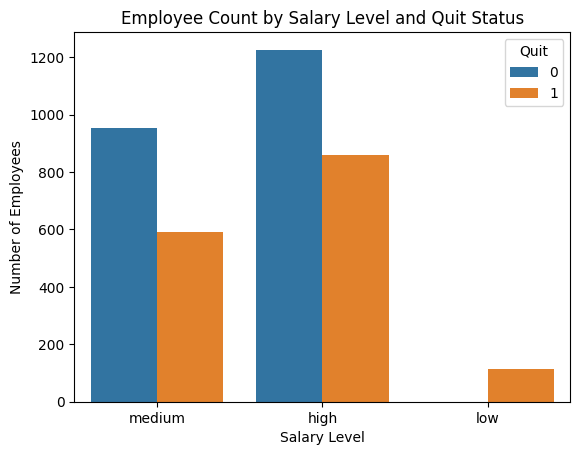

In [18]:
sns.countplot(
    data=hr_data,
    x="Salary",
    hue="Quit"
)
plt.title("Employee Count by Salary Level and Quit Status")
plt.xlabel("Salary Level")
plt.ylabel("Number of Employees")
plt.show()

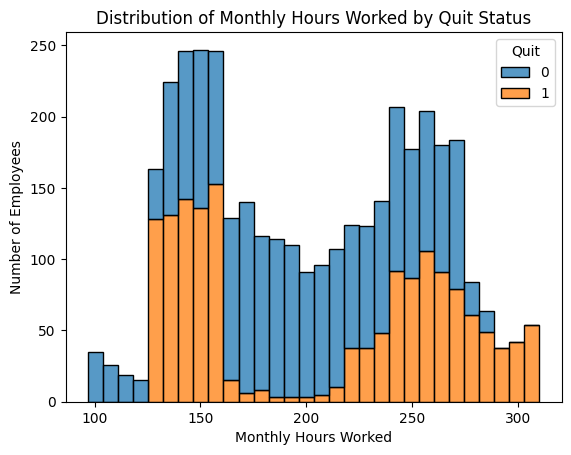

In [17]:
sns.histplot(
    data=hr_data,
    x="MonthlyHours",
    hue="Quit",
    bins=30,
    multiple="stack"
)
plt.title("Distribution of Monthly Hours Worked by Quit Status")
plt.xlabel("Monthly Hours Worked")
plt.ylabel("Number of Employees")
plt.show()

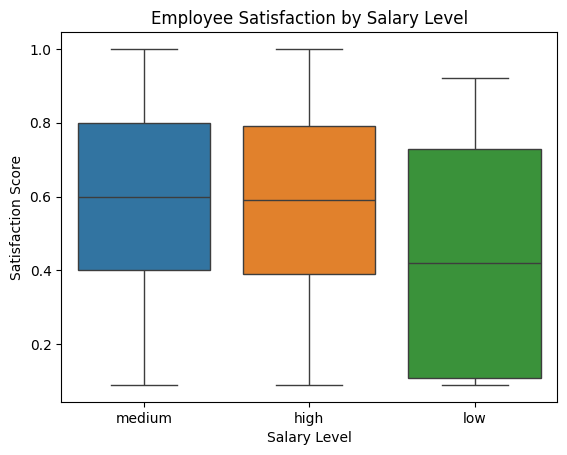

In [19]:
sns.boxplot(
    data=hr_data,
    x="Salary",
    y="Satisfaction",
    hue="Salary"
)
plt.title("Employee Satisfaction by Salary Level")
plt.xlabel("Salary Level")
plt.ylabel("Satisfaction Score")
plt.show()

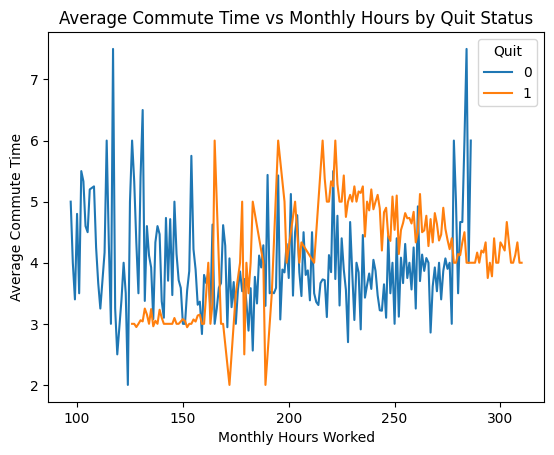

In [20]:
sns.lineplot(
    data=hr_data,
    x="MonthlyHours",
    y="CommuteTime",
    hue="Quit",
    estimator="mean",
    errorbar=None
)
plt.title("Average Commute Time vs Monthly Hours by Quit Status")
plt.xlabel("Monthly Hours Worked")
plt.ylabel("Average Commute Time")
plt.show()

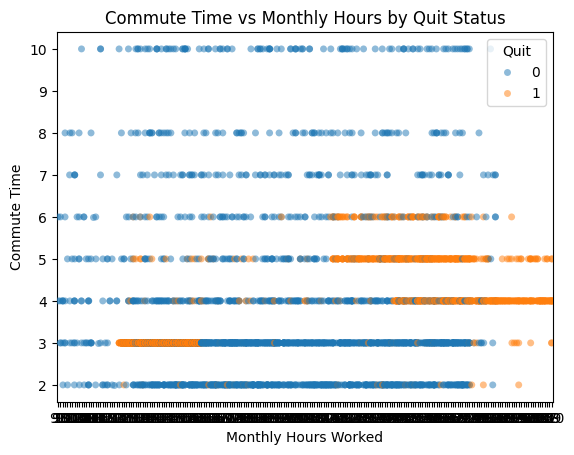

In [24]:
sns.stripplot(
    data=hr_data,
    x="MonthlyHours",
    y="CommuteTime",
    hue="Quit",
    jitter=True,
    alpha=0.5
)
plt.title("Commute Time vs Monthly Hours by Quit Status")
plt.xlabel("Monthly Hours Worked")
plt.ylabel("Commute Time")
plt.show()


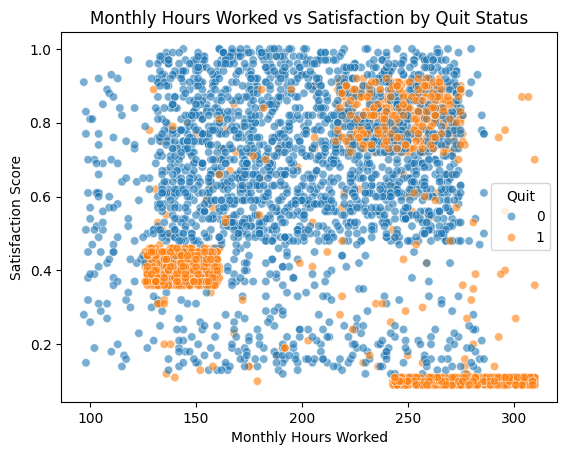

In [25]:
sns.scatterplot(
    data=hr_data,
    x="MonthlyHours",
    y="Satisfaction",
    hue="Quit",
    alpha=0.6
)
plt.title("Monthly Hours Worked vs Satisfaction by Quit Status")
plt.xlabel("Monthly Hours Worked")
plt.ylabel("Satisfaction Score")
plt.show()

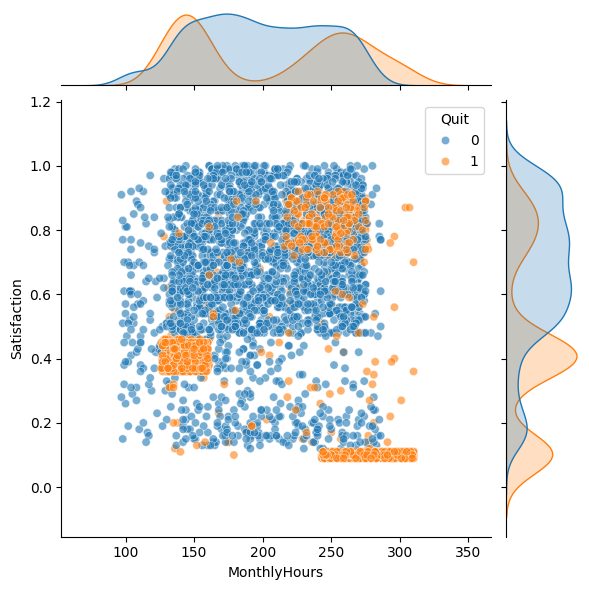

In [26]:
sns.jointplot(
    data=hr_data,
    x="MonthlyHours",
    y="Satisfaction",
    hue="Quit",
    alpha=0.6
)

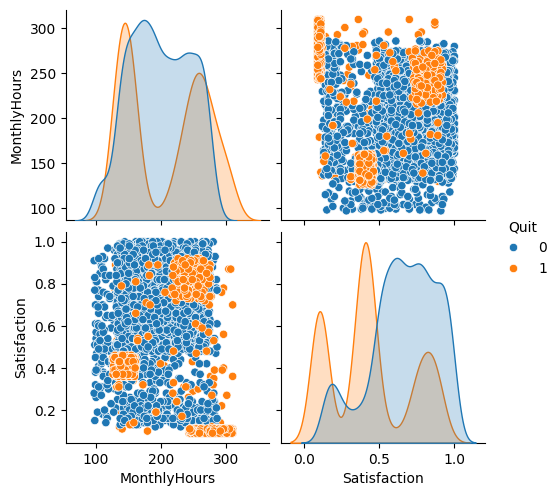

In [27]:
import seaborn as sns

sns.pairplot(
    hr_data,
    vars=["MonthlyHours", "Satisfaction"],
    hue="Quit"
)

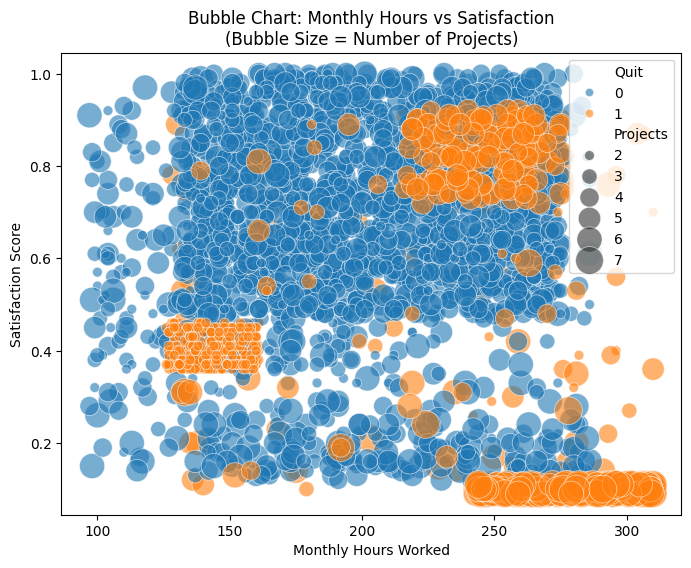

In [29]:
plt.figure(figsize=(8, 6))

sns.scatterplot(
    data=hr_data,
    x="MonthlyHours",
    y="Satisfaction",
    hue="Quit",
    size="Projects",
    sizes=(50, 400), 
    alpha=0.6,
    legend="brief"
)

plt.title("Bubble Chart: Monthly Hours vs Satisfaction\n(Bubble Size = Number of Projects)")
plt.xlabel("Monthly Hours Worked")
plt.ylabel("Satisfaction Score")
plt.show()

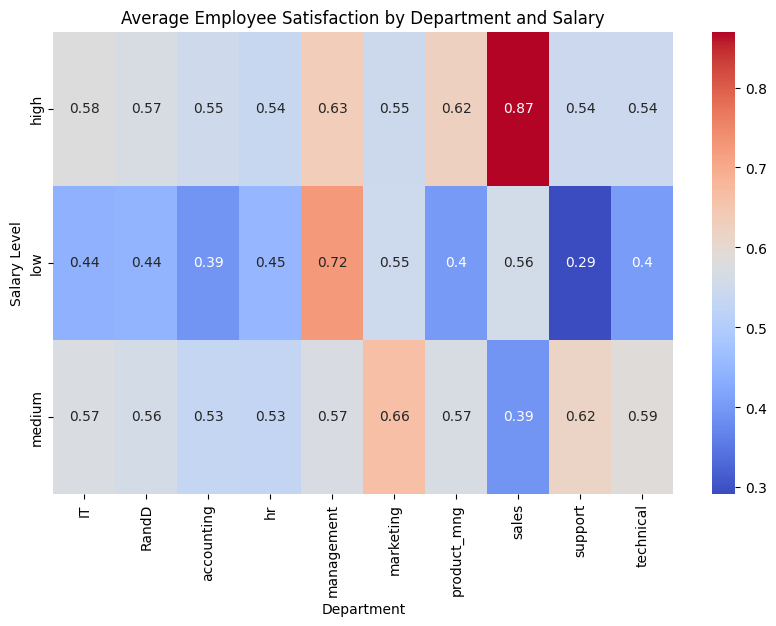

In [30]:
satisfaction_pivot = hr_data.pivot_table(
    values="Satisfaction",
    index="Salary",
    columns="Department",
    aggfunc="mean"
)

plt.figure(figsize=(10, 6))
sns.heatmap(
    satisfaction_pivot,
    annot=True,
    cmap="coolwarm"
)
plt.title("Average Employee Satisfaction by Department and Salary")
plt.xlabel("Department")
plt.ylabel("Salary Level")
plt.show()

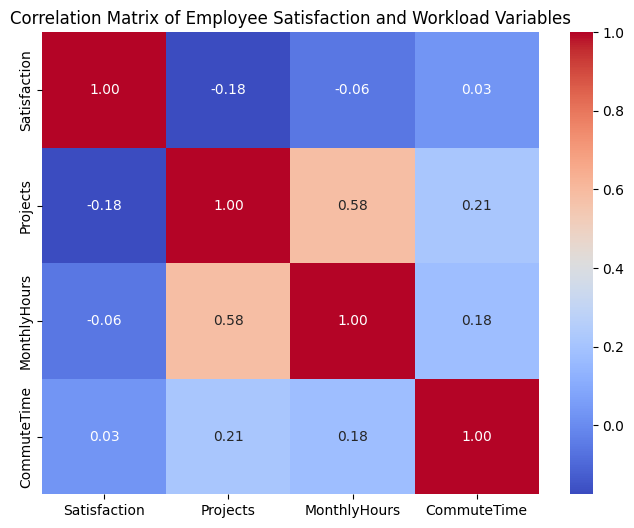

In [31]:
corr_data = hr_data[["Satisfaction", "Projects", "MonthlyHours", "CommuteTime"]]

corr_matrix = corr_data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)
plt.title("Correlation Matrix of Employee Satisfaction and Workload Variables")
plt.show()